In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
#r3=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases 2020_2024 Unrestricted.csv")
#r1=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases 2010_2014 Unrestricted.csv")
#r2=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases 2015_2019 Unrestricted.csv")
#df =pd.concat([r1,r2,r3],axis=0)

#df.to_csv("/content/drive/MyDrive/311 cases/311 Cases.csv")
r=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases.csv")
ind=pd.read_csv("/content/drive/MyDrive/New.csv")
cons_group=[]

group=r.groupby('CT_ID_10')#['REASON']
for key,value in group:
    #print(value)
    df=pd.core.frame.DataFrame(value)
    total=df.shape[0]
    #print(df.keys())
    most_key=df["REASON"].value_counts().idxmax()
    most=df["REASON"].value_counts()[df["REASON"].value_counts().idxmax()]
    ratio = most/total
    cons=[key,total,most_key,most,ratio]
    cons_group.append(cons)
ratio_group=sorted(cons_group,key=(lambda x:x[4]),reverse=True)
most_group=sorted(cons_group,key=(lambda x:x[3]),reverse=True)
print(cons_group)

<ipython-input-36-c37147962fb1>:11: DtypeWarning: Columns (17,18,29) have mixed types. Specify dtype option on import or set low_memory=False.
  r=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases.csv")


[[25017373600.0, 69, 'Highway Maintenance', 23, 0.3333333333333333], [25021400100.0, 81, 'Signs & Signals', 25, 0.30864197530864196], [25021400202.0, 98, 'General Request', 46, 0.46938775510204084], [25021400600.0, 5, 'Enforcement & Abandoned Vehicles', 2, 0.4], [25021401201.0, 9, 'Signs & Signals', 3, 0.3333333333333333], [25021416102.0, 7, 'Highway Maintenance', 4, 0.5714285714285714], [25025000100.0, 18353, 'Sanitation', 2625, 0.1430283877295265], [25025000101.0, 70, 'General Request', 16, 0.22857142857142856], [25025000102.0, 405, 'Enforcement & Abandoned Vehicles', 107, 0.2641975308641975], [25025000201.0, 13992, 'Sanitation', 2885, 0.20618925100057175], [25025000202.0, 13251, 'Sanitation', 2689, 0.20292808089955475], [25025000301.0, 10379, 'Sanitation', 2280, 0.21967434242219866], [25025000302.0, 10431, 'Sanitation', 2136, 0.20477423065861375], [25025000401.0, 15307, 'Enforcement & Abandoned Vehicles', 2719, 0.17763114914744887], [25025000402.0, 13264, 'Sanitation', 2145, 0.16171

In [ ]:
r1=pd.read_csv("/content/drive/MyDrive/CT00.csv")
r2=pd.read_csv("/content/drive/MyDrive/CT10.csv")
df =pd.concat([r1,r2],axis=0)
data1_subset = df[['CTIDFP00','INTPTLAT00','INTPTLON00']]


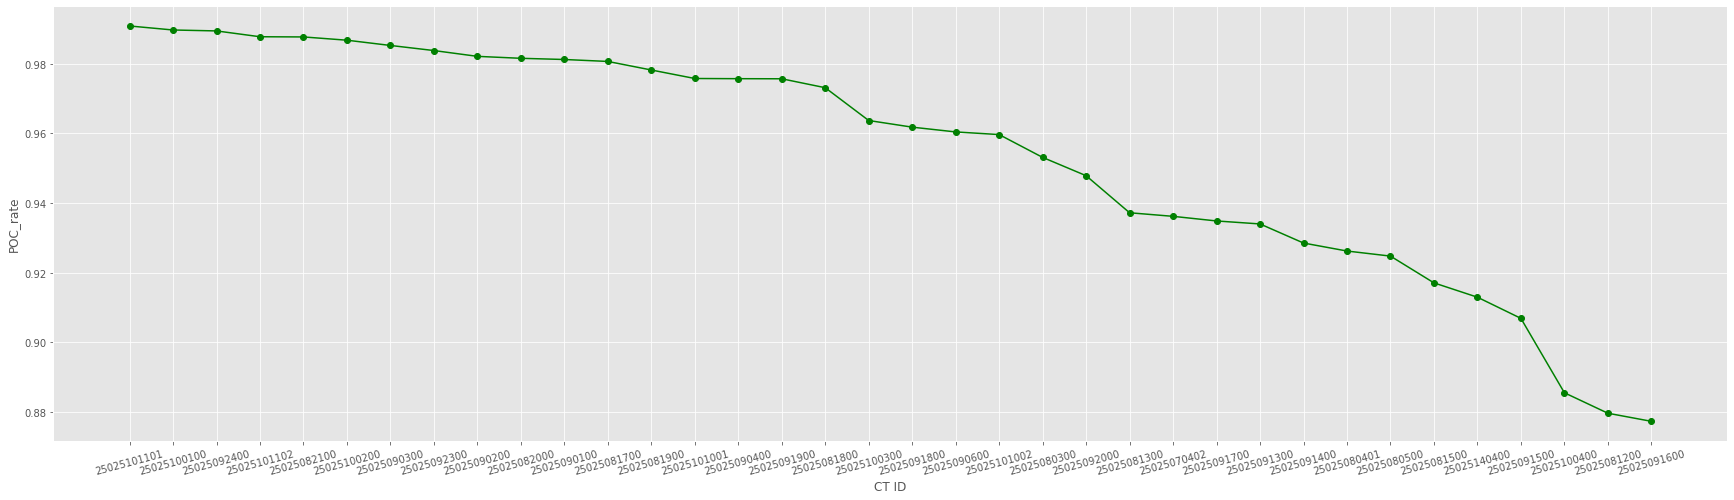

In [ ]:
group_CT=np.array(ind.nlargest(36, "ratio_POC2")["GEOID10(census tract)"])
group_POC=np.array(ind.nlargest(36, "ratio_POC2")["ratio_POC2"])
fig = plt.figure(figsize=(30,8))
plt.figure(1)
i=range(36)
plt.plot(i, group_POC, color='green', marker='o', linestyle='solid')
plt.xticks(i,group_CT,rotation=15)
plt.xlabel('CT ID')
plt.ylabel('POC_rate')
plt.savefig("/content/drive/MyDrive/sparkfigs/POC_pattern.png")

In [ ]:
sort_rnums=r["CT_ID_10"].value_counts()
CT_all=np.array(ind["GEOID10(census tract)"])
xtrain=[]
ytrain=[]
for CT in CT_all:
  #if sort_rnums[CT]/ind.loc[ind["GEOID10(census tract)"]==CT]["POP100_RE"].values[0]<30:
    x1=ind.loc[ind["GEOID10(census tract)"]==CT]["ratio_oad"].values[0]
    x2=ind.loc[ind["GEOID10(census tract)"]==CT]["ratio_dis"].values[0]
    x3=ind.loc[ind["GEOID10(census tract)"]==CT]["ratio_chi"].values[0]
    x4=ind.loc[ind["GEOID10(census tract)"]==CT]["ratio_ln"].values[0]
    x5=ind.loc[ind["GEOID10(census tract)"]==CT]["ratio_LEP"].values[0]
    x6=ind.loc[ind["GEOID10(census tract)"]==CT]["ratio_POC2"].values[0]
    x7=ind.loc[ind["GEOID10(census tract)"]==CT]["ratio_Mel"].values[0]
    xtrain.append([x1,x2,x3,x4,x5,x6,x7])
    if ind.loc[ind["GEOID10(census tract)"]==CT]["POP100_RE"].values[0]==0:
          y1=0
    else:
          y1=sort_rnums[CT]/ind.loc[ind["GEOID10(census tract)"]==CT]["POP100_RE"].values[0]
    ytrain.append(y1)

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')
clf.fit(xtrain, ytrain)
#clf.score(xtrain,ytrain)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [ ]:
xextract=[[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,1]]
clf.predict(xextract)

array([ 85.55173531, 101.19828532,   0.58318583,   5.18458321,
        10.53913212,  55.25675215,  18.69190505])

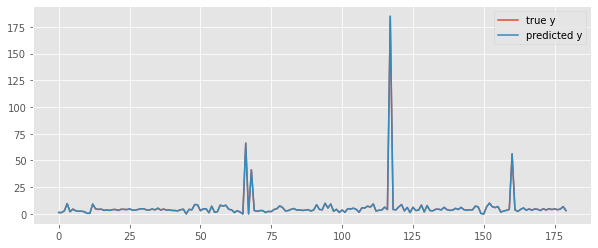

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,4))
plt.plot(np.arange(len(xtrain)), ytrain, label='true y') #画出原始变量的曲线
plt.plot(np.arange(len(xtrain)), clf.predict(xtrain), label='predicted y') #画出预测变量曲线
plt.legend(loc=0)
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/regression_predict_select.png")

In [ ]:
#print(ind["requests"])
#ind.insert(ind.shape[1],'requests',0)
#ind.insert(ind.shape[1],'ratio_requests',0)
sort_rnums=r["CT_ID_10"].value_counts()
#print(sort_rnums)
#for row in sort_rnums.iterrows():
CT_all=np.array(ind["GEOID10(census tract)"])
sorted_sr=[]
for CT in CT_all:
  for cons in cons_group:
    if cons[0]==CT:
      sorted_sr.append(cons[2])
#print(CT_all)
#print(sorted_sr)
  #print(CT)
  #sorted_sr.append(sort_rnums[CT])
#ind.insert(ind.shape[1],'type',sorted_sr)
ind.to_csv("/content/drive/MyDrive/New.csv")
#ind.loc[:,ind.shape[1]]=sorted_sr
  #ind.loc[ind["GEOID10(census tract)"]==CT]['requests']=sort_rnums[CT]
#print(ind["requests"])
#print(ind["GEOID10(census tract)"])
#print(sort_rnums[25025010405])

[[25025030300.0, 41620, 'General Request', 9652, 0.23190773666506487], [25025020200.0, 29618, 'Street Cleaning', 8350, 0.281923154838274], [25025060501.0, 30755, 'Enforcement & Abandoned Vehicles', 8025, 0.2609331815964884], [25025070101.0, 39018, 'General Request', 7124, 0.18258239786765082], [25025060101.0, 21351, 'Enforcement & Abandoned Vehicles', 6918, 0.3240129267949979], [25025060400.0, 28960, 'Enforcement & Abandoned Vehicles', 6784, 0.23425414364640884], [25025071101.0, 28122, 'Needle Program', 6128, 0.2179076879311571], [25025140400.0, 25136, 'Sanitation', 5969, 0.23746817313812857], [25025130100.0, 22319, 'Sanitation', 5923, 0.2653792732649312], [25025070300.0, 36366, 'General Request', 5660, 0.1556398834075785]]


<Figure size 432x288 with 0 Axes>

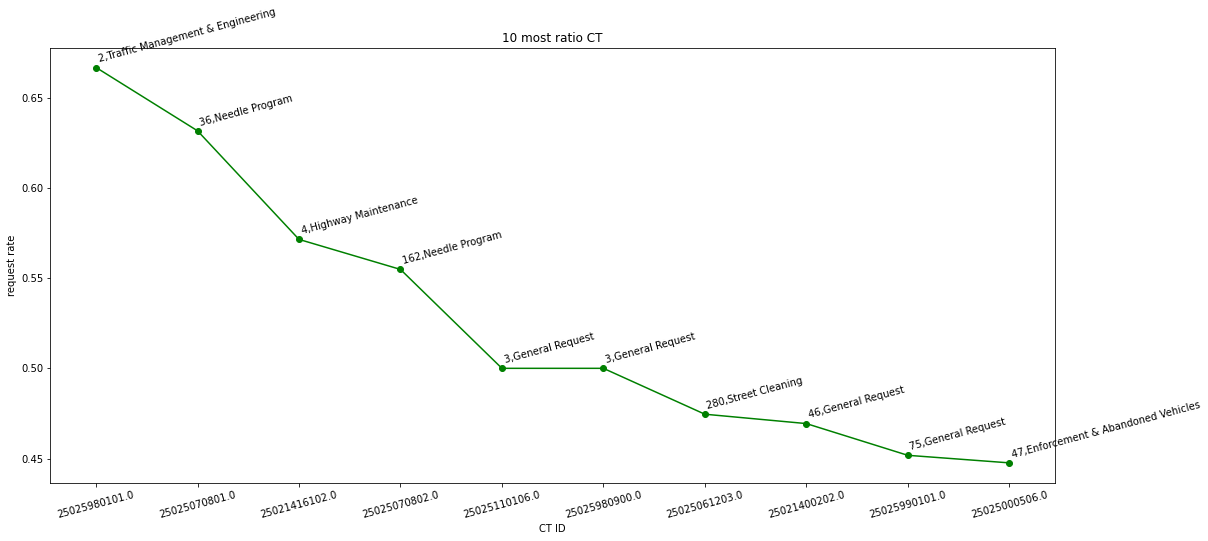

In [ ]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(18,8))
plt_CTID=[x[0] for x in ratio_group[:10]] #if x[1]>=500]#CT_ID
plt_total=[x[1] for x in ratio_group[:10]] # if x[1]>=500]#所有request数
plt_most_key=[x[2] for x in ratio_group[:10]] # if x[1]>=500]#最多的request
plt_most=[x[3] for x in ratio_group[:10]] # if x[1]>=500]#最多request的数量
plt_ratio=[x[4] for x in ratio_group[:10]] # if x[1]>=500]#最多request占比
i=range(10)
plt.bar(i, plt_ratio, color='green', marker='o', linestyle='solid')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('10 most ratio CT')
#plt.legend()
plt.xticks(i,plt_CTID,rotation=15)
for i in range (10):
    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_most[i],'.0f'))+','+str(plt_most_key[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_ratio_all.png")

#plt.figure(2)


#print(np.array(group))


[[25025030300.0, 41620, 'General Request', 9652, 0.23190773666506487], [25025020200.0, 29618, 'Street Cleaning', 8350, 0.281923154838274], [25025060501.0, 30755, 'Enforcement & Abandoned Vehicles', 8025, 0.2609331815964884], [25025070101.0, 39018, 'General Request', 7124, 0.18258239786765082], [25025060101.0, 21351, 'Enforcement & Abandoned Vehicles', 6918, 0.3240129267949979], [25025060400.0, 28960, 'Enforcement & Abandoned Vehicles', 6784, 0.23425414364640884], [25025071101.0, 28122, 'Needle Program', 6128, 0.2179076879311571], [25025140400.0, 25136, 'Sanitation', 5969, 0.23746817313812857], [25025130100.0, 22319, 'Sanitation', 5923, 0.2653792732649312], [25025070300.0, 36366, 'General Request', 5660, 0.1556398834075785]]


<Figure size 432x288 with 0 Axes>

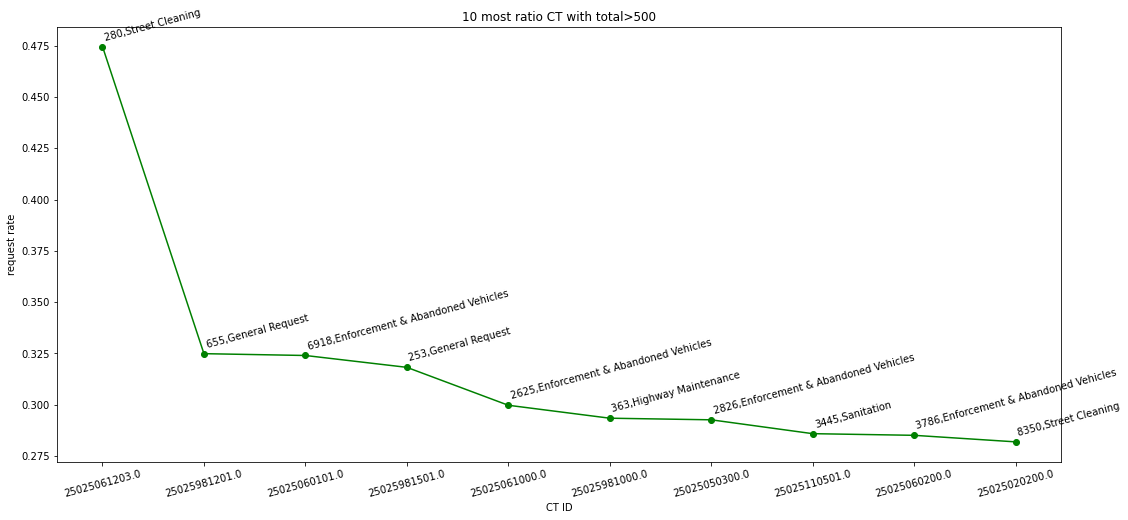

In [ ]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(18,8))
plt_CTID=[x[0] for x in ratio_group if x[1]>=200]#CT_ID
plt_total=[x[1] for x in ratio_group if x[1]>=200]#所有request数
plt_most_key=[x[2] for x in ratio_group if x[1]>=200]#最多的request
plt_most=[x[3] for x in ratio_group if x[1]>=200]#最多request的数量
plt_ratio=[x[4] for x in ratio_group if x[1]>=200]#最多request占比
i=range(10)
plt.plot(i, plt_ratio[:10], color='green', marker='o', linestyle='solid')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('10 most ratio CT with total>500')
#plt.legend()
plt.xticks(i,plt_CTID[:10],rotation=15)
for i in range (10):
    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_most[i],'.0f'))+','+str(plt_most_key[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_ratio_select.png")

[[25025030300.0, 41620, 'General Request', 9652, 0.23190773666506487], [25025020200.0, 29618, 'Street Cleaning', 8350, 0.281923154838274], [25025060501.0, 30755, 'Enforcement & Abandoned Vehicles', 8025, 0.2609331815964884], [25025070101.0, 39018, 'General Request', 7124, 0.18258239786765082], [25025060101.0, 21351, 'Enforcement & Abandoned Vehicles', 6918, 0.3240129267949979], [25025060400.0, 28960, 'Enforcement & Abandoned Vehicles', 6784, 0.23425414364640884], [25025071101.0, 28122, 'Needle Program', 6128, 0.2179076879311571], [25025140400.0, 25136, 'Sanitation', 5969, 0.23746817313812857], [25025130100.0, 22319, 'Sanitation', 5923, 0.2653792732649312], [25025070300.0, 36366, 'General Request', 5660, 0.1556398834075785]]
[[25025980700.0, 1110, 'General Request', 210, 0.1891891891891892], [25025030302.0, 901, 'General Request', 184, 0.20421753607103219], [25025981501.0, 795, 'General Request', 253, 0.3182389937106918], [25025070104.0, 652, 'General Request', 158, 0.24233128834355827]

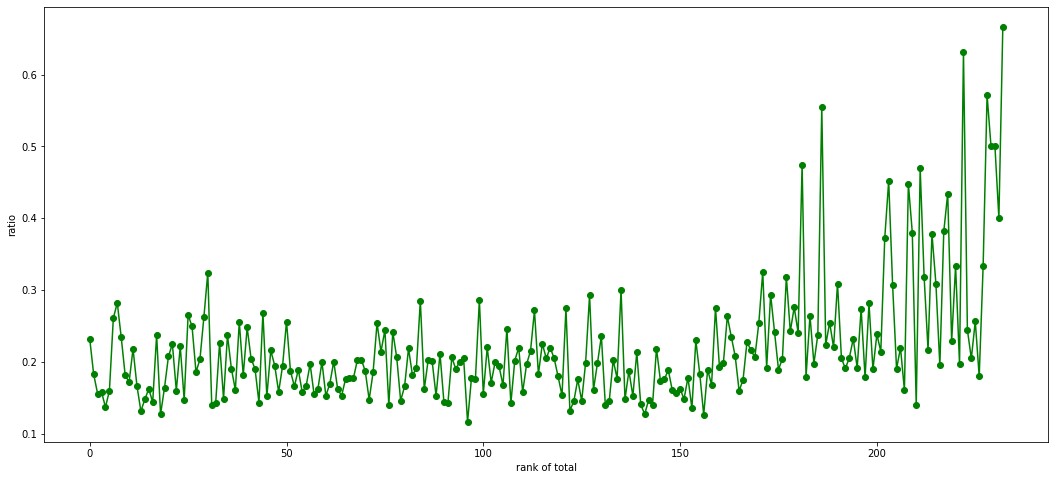

<Figure size 432x288 with 0 Axes>

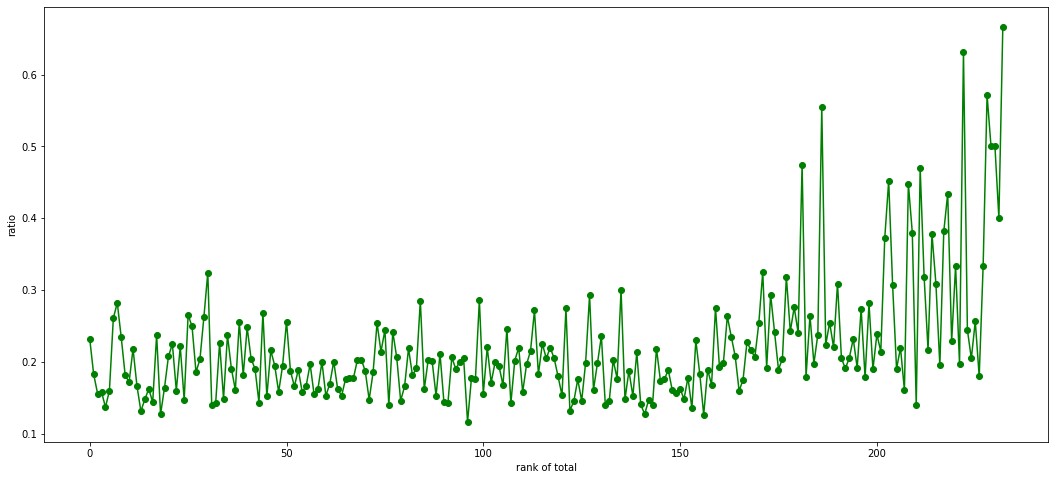

In [ ]:
print(most_group[:10])
total_group=sorted(cons_group,key=(lambda x:x[1]),reverse=True)
print(total_group[175:200])
plt.figure(1)
fig = plt.figure(figsize=(18,8))
#plt_CTID=[x[0] for x in most_group] #if x[1]>=500]#CT_ID
#plt_total=[x[1] for x in total_group] # if x[1]>=500]#所有request数
#plt_most_key=[x[2] for x in most_group] # if x[1]>=500]#最多的request
#plt_most=[x[3] for x in most_group] # if x[1]>=500]#最多request的数量
plt_ratio=[x[4] for x in total_group] # if x[1]>=500]#最多request占比
i=range(len(plt_ratio))
plt.plot(i, plt_ratio, color='green', marker='o', linestyle='solid')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
#plt.title('10 most nums CT')
#plt.legend()
#plt.xticks(i,plt_total,rotation=15)
#for i in range (10):
#    plt.text(i+0.01,plt_most[i]+50,str(format(plt_ratio[i],'.3f'))+','+str(plt_most_key[i]),rotation=15)
plt.xlabel('rank of total')
plt.ylabel('ratio')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/total_ratio.png")

plt.figure(2)


#print(np.array(group))

In [ ]:
l=pd.read_csv("/content/drive/MyDrive/Climate_Ready_Boston_Social_Vulnerability.csv")
